In [210]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



In [211]:
# Charger les données depuis un fichier CSV
data = pd.read_csv("donneInterference.csv", sep=";")  # Remplacez par le chemin vers votre fichier
data['temps'] = data['temps'].str.replace(',', '.').astype(float)
data['intensite'] = data['intensite'].str.replace(',', '.').astype(float)

temps = data['temps'].values
intensite = data['intensite'].values



In [212]:
lb = 0.550
# Définir le modèle
def intensite_modele(t, w, phi, A, I_0, contraste, Delta_L0):

    Delta_L = Delta_L0 + A * np.cos(w * t + phi)
    I = I_0 * (1 + contraste *  np.cos(2 * np.pi * Delta_L / lb))
    
    return I



Paramètres optimisés :
w = 1184.8761231357546
phi = 0.3139095680473307
amplitude = 0.9830745770896357
intesite_opt = 0.5015775475068835
contraste_opt = 0.12377202708724258
Delta_L0 = 0.3785733244567564


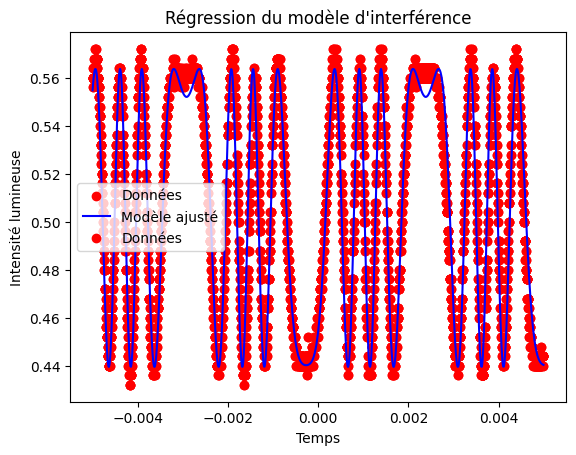

In [213]:
I_0 = 0.5  # Intensité maximale
lambda_ = 0.5  # Longueur d'onde en microns
Delta_L0 = 0.4  # Différence de marche statique en microns
A = 0.9  # Amplitude de l'oscillation en microns
omega = 2 * np.pi  # Pulsation en rad/s
phi = 0.4 # Phase initiale en radians
contraste = 0.14

#intensite_modele_mano = intensite_modele(temps_modele, omega*180, phi, A, I_0, contraste, Delta_L0)

# Initialiser les paramètres (estimation)
parametres_initiaux = [omega*180, phi, A, I_0, contraste, Delta_L0]  # [w, phi, amplitude, intensité , contraste, delta_l0]

# Effectuer l'ajustement des paramètres
params_opt, params_cov = curve_fit(intensite_modele, temps, intensite, p0=parametres_initiaux)

# Extraire les paramètres optimaux
w_opt, phi_opt, amplitude_opt, intensite_opt, contraste_opt, Delta_L0 = params_opt

# Afficher les résultats
print("Paramètres optimisés :")
print(f"w = {w_opt}")
print(f"phi = {phi_opt}")
print(f"amplitude = {amplitude_opt}")
print(f"intesite_opt = {intensite_opt}")
print(f"contraste_opt = {contraste_opt}")
print(f"Delta_L0 = {Delta_L0}")

# Tracer les données et le modèle ajusté
temps_modele = np.linspace(min(temps), max(temps), 1000)
intensite_modele_opt = intensite_modele(temps_modele, w_opt, phi_opt, amplitude_opt, intensite_opt, contraste_opt, Delta_L0)

plt.scatter(temps, intensite, label="Données", color='red')
plt.plot(temps_modele, intensite_modele_opt, label="Modèle ajusté", color='blue')
plt.xlabel("Temps")
plt.ylabel("Intensité lumineuse")
plt.legend()
plt.title("Régression du modèle d'interférence")

I_0 = 0.5  # Intensité maximale
lambda_ = 0.5  # Longueur d'onde en microns
Delta_L0 = 0.4  # Différence de marche statique en microns
A = 0.9  # Amplitude de l'oscillation en microns
omega = 2 * np.pi  # Pulsation en rad/s
phi = 0.4 # Phase initiale en radians
contraste = 0.14

intensite_modele_mano = intensite_modele(temps_modele, omega*188.2, phi, A, I_0, contraste, Delta_L0)

plt.scatter(temps, intensite, label="Données", color='red')
#plt.plot(temps_modele, intensite_modele_mano, label="Modèle ajusté", color='green')
plt.xlabel("Temps")
plt.ylabel("Intensité lumineuse")
plt.legend()
plt.title("Régression du modèle d'interférence")

plt.show()

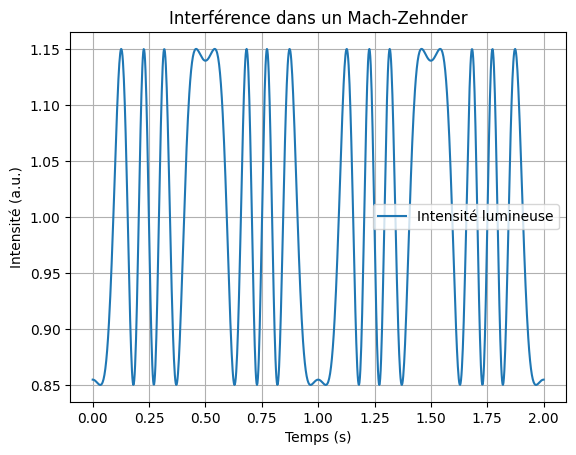

In [214]:
# Paramètres
I_0 = 1.0  # Intensité maximale
lambda_ = 0.5  # Longueur d'onde en microns
Delta_L0 = 0.37  # Différence de marche statique en microns
A = 0.9  # Amplitude de l'oscillation en microns
omega = 2 * np.pi  # Pulsation en rad/s
phi = 0  # Phase initiale en radians
contraste = 0.15

# Temps
t = np.linspace(0, 2, 1000)  # Temps en secondes

# Intensité lumineuse
Delta_L = Delta_L0 + A * np.cos(omega * t + phi)
I = I_0 * (1 + contraste * np.cos(2 * np.pi * Delta_L / lambda_))

# Tracé

plt.plot(t, I, label="Intensité lumineuse")
plt.xlabel("Temps (s)")
plt.ylabel("Intensité (a.u.)")
plt.title("Interférence dans un Mach-Zehnder")
plt.grid()
plt.legend()
plt.show()